# Model Exploration

Initial attempt to classify using 3 seperate algorithms:
1. Bag of words ((https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) with random forest classification to fit our training data. Due to limitedness of memory, we were only able to perform random forest classification at tree level of 10. 
2. Own Naive Bayesian 



## Importing Libraries

In [109]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


SyntaxError: invalid syntax (<ipython-input-109-19fbafa6de39>, line 16)

## Bag of Words Processing


To generate a bag of words, we need to do some level of data cleaning beforehand. It would be sad if some of the common meaningless stop words like "the", "a" becomes the features of our bag of word. After that, we will use scikit-learn's bag of words tool "CountVectorizer" to generate a vectorizer of 1000 words. By using the bag of words, we then use random forest classification of level 10 to fit our training bag of words. After following the tutorial, we want to incorporate our discoverings from data exploration to the bag of words. Specifically, we wanted to filter out words of high standard deviation while keeping those with high frequency. We first import both train and test data and drop "Nan" entries for basic data cleaning



In [85]:
# get train & test csv files as a DataFrame
train = pd.read_csv("./data/total_data.csv", sep=',')
test = pd.read_csv("./data/test_data.csv", sep=',')

#clean data
train = train.dropna()
test = test.dropna()
train['processed_body'] = train['body'].apply(text_to_words)
test['processed_body'] = train ['body'].apply(text_to_words)

                             who                                   date  \
0                  Rowan Sharman      Thursday, May 10, 2018 2:24:37 AM   
1                 Nina Tchirkova      Wednesday, May 9, 2018 9:05:55 PM   
2                    Logan Sweet      Wednesday, May 9, 2018 7:55:25 PM   
3                    Miranda Lao      Wednesday, May 9, 2018 7:24:50 PM   
4                    Lucy Wilcox      Wednesday, May 9, 2018 7:00:51 PM   
5                     Cedric Kim      Wednesday, May 9, 2018 5:09:13 PM   
6                    Paul Ruvolo      Wednesday, May 9, 2018 4:40:50 PM   
7                Matthew Brucker     Wednesday, May 9, 2018 11:46:40 AM   
8                    Eric Miller     Wednesday, May 9, 2018 11:45:34 AM   
9                  Maya Calabria     Wednesday, May 9, 2018 10:25:37 AM   
10                   Logan Sweet       Tuesday, May 8, 2018 10:28:52 PM   
11                 Rowan Sharman        Tuesday, May 8, 2018 6:14:31 PM   
12             Samantha E

## Bag Of Words Algorithm

Using the cleaned up data we can proceed with our model - bag of words: which will create a bag of words using the words from all of our entries and counts them. We will display the 1000 most common words. The following is the entire 

In [24]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(train['processed_body'].tolist())

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()



# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 10) 

# Fit the forest to the training data,using the bag of words as 
#features and the tag labels as response variable

# This may take a few minutes to run
forest = forest.fit( train_data_features, train["Tag"] )


# Get a bag of words for the test set, and convert to a numpy array# Get a 
test_data_features = vectorizer.transform(test['processed_body'].tolist())
test_data_features = test_data_features.toarray()

# Use the random forest to make tag label predictions
result = forest.predict(test_data_features)

def submission(predictions):
    """
    Use pandas to write the comma-separated output 
    file based on the predictions
    """
    
    submission = pd.DataFrame({
            "Review": test["who"],
            "Tag": predictions
        })

    submission.to_csv("Test_Results.csv", index=False, quoting=3)

#Use pandas to write the comma-separated output file
#prediction_generator(result, '/data/predictions.csv')


submission(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

[18 28]
                                       who  \
22  CarpediemOn Behalf OfZachary Davenport   
23  CarpediemOn Behalf OfZachary Davenport   

                                                 date  \
22  Friday, March 30, 2018 5:00:59 PM (UTC-05:00) ...   
23  Friday, March 30, 2018 5:00:59 PM (UTC-05:00) ...   

                     subject  \
22  carpediem@lists.olin.edu   
23  carpediem@lists.olin.edu   

                                            subject.1  \
22  [Carpediem] Want data to make strange correlat...   
23  [Carpediem] Want data to make strange correlat...   

                                           Unnamed: 4  \
22  > > Do you like strange correlations or intere...   
23  > > Do you like strange correlations or intere...   

                                       processed_body  
22                                          happening  
23  comfy couch needs sitter summer also shelving ...  


## Bag of Words Algorithm 2 

We can improve the basic model by improving what the bag of words is doing to our data by using what we learned from our data exploration 
1. 

We can begin by creating a dataframe 

{'Word': ['increases', 'surface', 'area', 'top', 'shelf', 'sticks', 'front', 'back', 'additional', 'height', 'like', 'sideways', 'box', 'slots', 'wh', 'shelves', 'wire', 'routing', 'holes', 'pretty', 'nice', 'shopbotted', 'ply', 'cad', 'rowan', 'eom', 'carpediem', 'mailing', 'list', 'lists', 'olin', 'edu', 'https', 'mailman', 'listinfo', 'couple', 'friends', 'mine', 'looking', 'third', 'roommate', 'house', 'massave', 'minute', 'walk', 'central', 'square', 'right', 'across', 'people', 'republic', 'bar', 'two', 'bedrooms', 'occupied', 'early', 'women', 'really', 'wonderful', 'easy', 'live', 'maybe', 'cat', 'someone', 'sign', 'yearlong', 'lease', 'starting', 'september', 'let', 'know', 'interested', 'want', 'info', 'logan', 'many', 'would', 'fewer', 'brand', 'new', 'literally', 'still', 'packaging', 'various', 'colors', 'career', 'fair', 'professional', 'camouflaging', 'capabilities', 'fidget', 'spinner', 'j', 'miranda', 'cake', 'cookies', 'hallway', 'entrance', 'auditorium', 'left', 'uoc

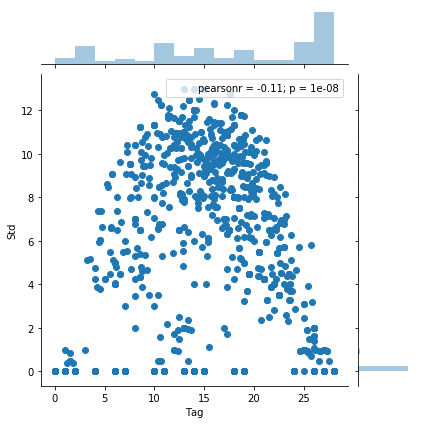

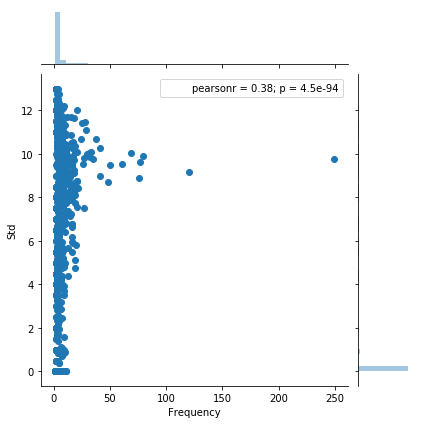

In [121]:
def word_df(df):
    """
    Create a dataframe documenting the frequency, standard deviation and 
    mean value of each unique word appears in the given dataframe  
    """
    word_dict = {}
    for index, row in df.iterrows():
        list =  text_to_words(row["body"]).split()
        tag = row["Tag"]
        
        for word in list:
            if word in word_dict:
                word_dict[word][0] += 1
                word_dict[word][1].append(tag)
            else:
                word_dict[word] = [1, [tag]]
    # reformat the word dictionary to be inputable by pandas
    word_dict_keys = []
    word_dict_values = []
    for i in word_dict.keys():
        word_dict_keys.append(i)
    for i in word_dict.values():
        word_dict_values.append(i)
    formatted_word_dict = {'Word': word_dict_keys, 'Frequency-Tag': word_dict_values};
    print(formatted_word_dict)
    word_df = pd.DataFrame(formatted_word_dict)
    print(word_df)
    
    #using nicer list method + columns, should work something wrong with python3 or libraries version
    #formatted_word_dict = {'keys': [word_dict.keys()], 'values': [word_dict.values()]};
    #word_df = pd.DataFrame(data = formatted_word_dict, columns=["Word", "Frequency-Tag"])
    
    word_df['Frequency'] = word_df['Frequency-Tag'].apply(lambda x: x[0])
    word_df['Tag'] = word_df['Frequency-Tag'].apply(lambda x: np.mean(x[1]))
    word_df['Std'] = word_df['Frequency-Tag'].apply(lambda x: float(np.std(x[1])))
    return word_df.drop('Frequency-Tag', 1).dropna().sort_values(['Frequency'], ascending=False)

# generate a word dataframe fortrain dataset
train_word_df = word_df(train)



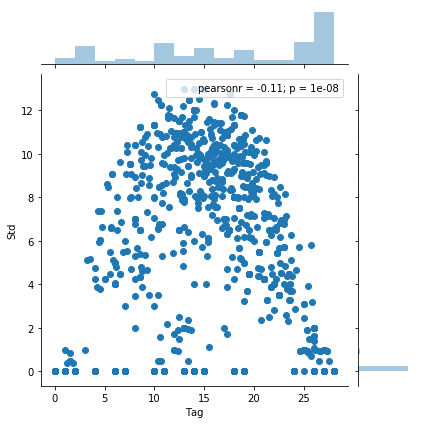

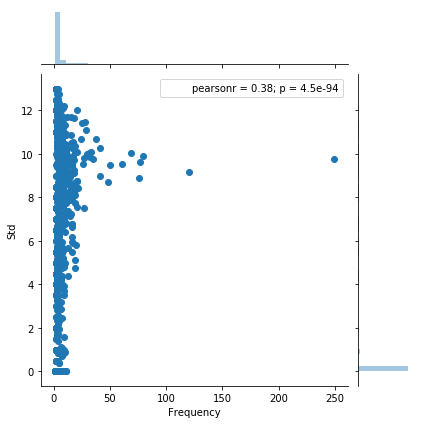

In [122]:
sns.jointplot(train_word_df['Tag'], train_word_df['Std'])
sns.jointplot(train_word_df['Frequency'], train_word_df['Std'])

In [ ]:
From the above visualization we can see that 

In [29]:
df = train
word_dict = {}
for index, row in df.iterrows():
list = tag_to_words(row["body"]).split()
    sentiment = row["Tag"]
       
    for word in list:
        if word in word_dict:
           word_dict[word][0] += 1
           word_dict[word][1].append(sentiment)
        else:
            word_dict[word] = [1, [sentiment]]
   
word_df = pd.DataFrame(word_dict.items(), columns=["Word", "Frequency-Sentiment"])
word_df['Frequency'] = word_df['Frequency-Sentiment'].apply(lambda x: x[0])
word_df['Sentiment'] = word_df['Frequency-Sentiment'].apply(lambda x: np.mean(x[1]))
word_df['Std'] = word_df['Frequency-Sentiment'].apply(lambda x: float(np.std(x[1])))
return word_df.drop('Frequency-Sentiment', 1).dropna().sort_values(['Frequency'], ascending=False)
print(df)


ValueError: DataFrame constructor not properly called!

Naive Bayesian

To do Naive Bayesian we will need to represent each of the 28 possible tags with a class probability to represent each potential outcome. We will get the frequency per word and then calculate the probability for each of the class probabilites by dividing the frequency of word with the total number of occurences that word occurs in that body of the email. To get the probability we multiply the probability for each word in that body against the probability of any document that expresses that tag

In [32]:
# we will start by creating 28 probabilities for any given document that expresses that tag
doc_prob_1 = float(len(train[train.Tag == 1]))/len(train)
doc_prob_2 = float(len(train[train.Tag == 2]))/len(train)
doc_prob_3 = float(len(train[train.Tag == 3]))/len(train)
doc_prob_4 = float(len(train[train.Tag == 4]))/len(train)
doc_prob_5 = float(len(train[train.Tag == 5]))/len(train)
doc_prob_6 = float(len(train[train.Tag == 6]))/len(train)
doc_prob_7 = float(len(train[train.Tag == 7]))/len(train)
doc_prob_8 = float(len(train[train.Tag == 8]))/len(train)
doc_prob_9 = float(len(train[train.Tag == 9]))/len(train)
doc_prob_10 = float(len(train[train.Tag == 10]))/len(train)
doc_prob_11 = float(len(train[train.Tag == 11]))/len(train)
doc_prob_12 = float(len(train[train.Tag == 12]))/len(train)
doc_prob_13 = float(len(train[train.Tag == 13]))/len(train)
doc_prob_14 = float(len(train[train.Tag == 14]))/len(train)
doc_prob_15 = float(len(train[train.Tag == 15]))/len(train)
doc_prob_16 = float(len(train[train.Tag == 16]))/len(train)
doc_prob_17 = float(len(train[train.Tag == 17]))/len(train)
doc_prob_18 = float(len(train[train.Tag == 18]))/len(train)
doc_prob_19 = float(len(train[train.Tag == 19]))/len(train)
doc_prob_20 = float(len(train[train.Tag == 20]))/len(train)
doc_prob_21 = float(len(train[train.Tag == 21]))/len(train)
doc_prob_22 = float(len(train[train.Tag == 22]))/len(train)
doc_prob_23 = float(len(train[train.Tag == 23]))/len(train)
doc_prob_24 = float(len(train[train.Tag == 24]))/len(train)
doc_prob_25 = float(len(train[train.Tag == 25]))/len(train)
doc_prob_26 = float(len(train[train.Tag == 26]))/len(train)
doc_prob_27 = float(len(train[train.Tag == 27]))/len(train)
doc_prob_28 = float(len(train[train.Tag == 28]))/len(train)

doc_probs = [doc_prob_1, doc_prob_2, doc_prob_3, doc_prob_4, doc_prob_5, doc_prob_6, doc_prob_7, doc_prob_8, doc_prob_9, doc_prob_10, doc_prob_11, doc_prob_12, doc_prob_13, doc_prob_14, doc_prob_15, doc_prob_16, doc_prob_17, doc_prob_18, doc_prob_19, doc_prob_20, doc_prob_21, doc_prob_22, doc_prob_23, doc_prob_24, doc_prob_25, doc_prob_26, doc_prob_27, doc_prob_28]



We will use the following functions to run our Naive Bayesian Algorithm

In [82]:
def tag_word(df):
    """ Takes: Test data in the form of dataframe
        Returns: A list value of words number in different tag
    """
    tag_word = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    for index, row in df.iterrows():
        tag = row["Tag"]
        tag_word[tag] += (row["processed_body"].count(" ") + 1)
    return tag_word

def create_reference_histogram(df):
    """Takes: A dataset of strings
       Returns: Dictionary w/ keys-words, value- list of values[sent=0,sent=1,sent=2,sent=3,sent=4,total] 
    """
    histogram = {}
    #we will iterate through each sentence and word and increment the index of the list of values
    for index, row in df.iterrows():
        tag_value = df.Tag[index]
        words = df["processed_body"][index].split()
        for word in words:
            if word in histogram:
                histogram[word][5] +=1
                histogram[word][tag_value] += 1
            else:
                histogram[word]= np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
                histogram[word][tag_value] += 1
    return histogram  

def calc_tag_probabilities(ref_dict,sent_freq):
    """ Takes: A tag value you are trying to test for
        Returns: Dictionary w/ keys-word value-probability of that word matching the value
        frequency = matching_value_freq/total_freq
    """   
    # make a copy of ref_dict
    final_dict = {}
    # we will iterate through every word in the dictionary and change the values from a list to the probability we want 
    # if the value is 0 we will add 1 as part of smooth
    for word in ref_dict:
        final_dict[word] = (ref_dict[word][:-1]+1)/(sent_freq + float(ref_dict[word][28]))
    return final_dict

def smooth(lst):
    """
    Intended to ignore new words by making probability 1
    """
    for ele in lst:
        if ele == 0: ele = 1
    return lst

def phrase_tag_prob(text, refer):
    """ Takes: A phrase in the form of a string
        Returns: A list of probabilities for different sentiments
    """
    probs = np.asarray(doc_probs)
    for word in text.split():
        if word in refer:
            probs *= smooth(refer[word])
    return probs    

def make_predictions(data, refer):
    """ Takes: Test data in the form of dataframe
        Returns: Submission File w. Sentiment value calculated
    """
    result = []
    lst = []
    for index, row in data.iterrows():
        lst = phrase_tag_prob(data['processed_body'][index], refer).tolist()
        result.append(lst.index(max(lst)))
    return result

In [123]:
overall_tag = tag_word(train)
hist = create_reference_histogram(train)
reference_hist = calc_tag_probabilities(hist,overall_tag)
result = make_predictions(test,reference_hist)
submission(result)

ValueError: operands could not be broadcast together with shapes (28,) (29,) 

0